In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [4]:
# Read in SAT Score CSV
sat_scores_df=pd.read_csv('SAT-score-data.csv')
sat_scores_df

,School District Code,School District Tested,District Average Score,District Number Tested
0,601,Appling County,1002.0,78
1,602,Atkinson County,952.0,57
2,603,Bacon County,1019.0,49
3,605,Baldwin County,915.0,122
4,606,Banks County,1055.0,53
...,...,...,...,...
172,786,Social Circle City,1036.0,52
173,789,Thomasville City,1080.0,66
174,791,Trion City,1085.0,15
175,792,Valdosta City,984.0,196


In [5]:
# Read graduation rate CSV
graduation_rate_df = pd.read_csv("../data_export/school_clean.csv")
graduation_rate_df

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
0,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.60
1,2017,602,Atkinson County,ALL,All Schools,97.0,60.0,61.86
2,2017,603,Bacon County,ALL,All Schools,118.0,66.0,55.93
3,2017,605,Baldwin County,ALL,All Schools,271.0,171.0,63.10
4,2017,606,Banks County,ALL,All Schools,209.0,108.0,51.67
...,...,...,...,...,...,...,...,...
180,2017,789,Thomasville City,ALL,All Schools,155.0,123.0,79.35
181,2017,791,Trion City,ALL,All Schools,88.0,69.0,78.41
182,2017,792,Valdosta City,ALL,All Schools,374.0,247.0,66.04
183,2017,793,Vidalia City,ALL,All Schools,167.0,114.0,68.26


In [6]:
# Merge dataframes
grad_sat_df = pd.merge(sat_scores_df, graduation_rate_df, on="School District Code")
grad_sat_df

,School District Code,School District Tested,District Average Score,District Number Tested,School Year,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
0,601,Appling County,1002.0,78,2017,Appling County,ALL,All Schools,198.0,118.0,59.60
1,602,Atkinson County,952.0,57,2017,Atkinson County,ALL,All Schools,97.0,60.0,61.86
2,603,Bacon County,1019.0,49,2017,Bacon County,ALL,All Schools,118.0,66.0,55.93
3,605,Baldwin County,915.0,122,2017,Baldwin County,ALL,All Schools,271.0,171.0,63.10
4,606,Banks County,1055.0,53,2017,Banks County,ALL,All Schools,209.0,108.0,51.67
...,...,...,...,...,...,...,...,...,...,...,...
170,786,Social Circle City,1036.0,52,2017,Social Circle City,ALL,All Schools,103.0,64.0,62.14
171,789,Thomasville City,1080.0,66,2017,Thomasville City,ALL,All Schools,155.0,123.0,79.35
172,791,Trion City,1085.0,15,2017,Trion City,ALL,All Schools,88.0,69.0,78.41
173,792,Valdosta City,984.0,196,2017,Valdosta City,ALL,All Schools,374.0,247.0,66.04


In [34]:
# Clean
# Drop unnecessary columns
clean_grad_sat_df=grad_sat_df.drop(columns=['School Year', 'School District Name','School Code','School Name'])
# Add percentage of college enrollment column to dataframe
clean_grad_sat_df['Percent of College Enrollment'] = clean_grad_sat_df['Postsecondary Institution']/clean_grad_sat_df['Graduates']*100
clean_grad_sat_df

,School District Code,School District Tested,District Average Score,District Number Tested,Graduates,Postsecondary Institution,Percent,Percent of College Enrollment
0,601,Appling County,1002.0,78,198.0,118.0,59.60,59.595960
1,602,Atkinson County,952.0,57,97.0,60.0,61.86,61.855670
2,603,Bacon County,1019.0,49,118.0,66.0,55.93,55.932203
3,605,Baldwin County,915.0,122,271.0,171.0,63.10,63.099631
4,606,Banks County,1055.0,53,209.0,108.0,51.67,51.674641
...,...,...,...,...,...,...,...,...
170,786,Social Circle City,1036.0,52,103.0,64.0,62.14,62.135922
171,789,Thomasville City,1080.0,66,155.0,123.0,79.35,79.354839
172,791,Trion City,1085.0,15,88.0,69.0,78.41,78.409091
173,792,Valdosta City,984.0,196,374.0,247.0,66.04,66.042781


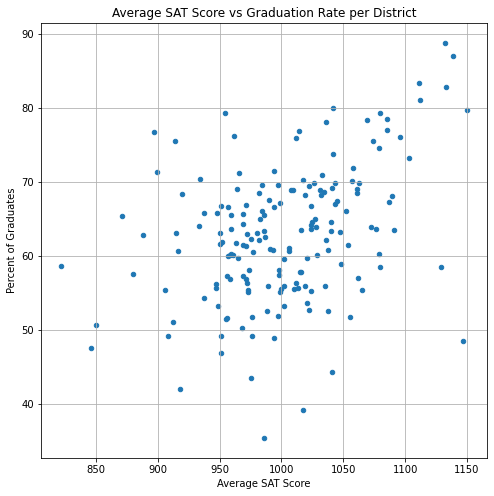

In [61]:
# Compare average SAT score with graduation rate (scatterplot/linear regression)
clean_grad_sat_df.plot(kind="scatter", x="District Average Score", y="Percent", grid=True, figsize=(8,8),
              title="Average SAT Score vs Graduation Rate per District")
plt.xlabel('Average SAT Score')
plt.ylabel('Percent of Graduates')
plt.savefig("Images/SATvsGradScatter")
plt.show()

The r-squared is: 0.1509583011635504
The p-value is: 1.0770314310689837e-07


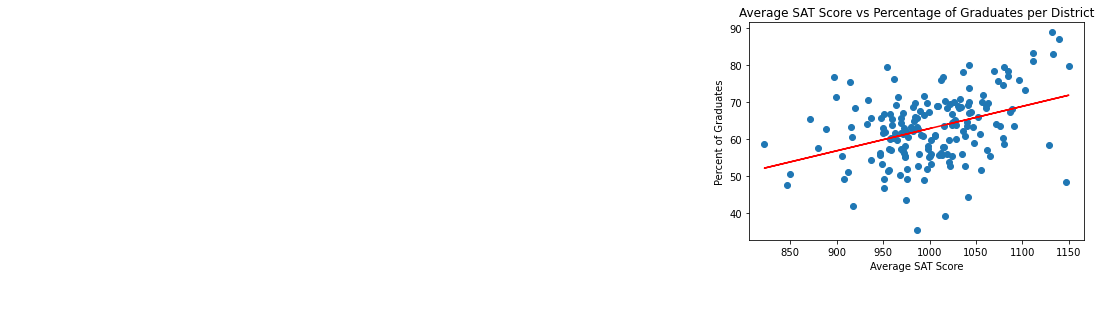

In [62]:
# Linear Regression
x_values = clean_grad_sat_df['District Average Score']
y_values = clean_grad_sat_df['Percent']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Average SAT Score vs Percentage of Graduates per District')
plt.xlabel('Average SAT Score')
plt.ylabel('Percent of Graduates')
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.savefig("Images/SATvsGradReg")
plt.show()

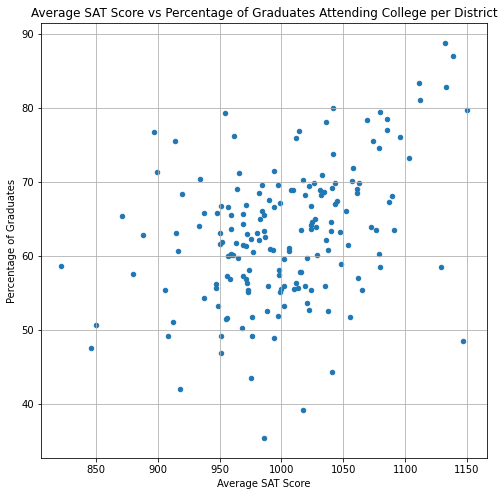

In [63]:
# Compare average SAT score with college enrollment (scatterplot/linear regression)
clean_grad_sat_df.plot(kind="scatter", x="District Average Score", y="Percent of College Enrollment", grid=True, figsize=(8,8),
              title="Average SAT Score vs Percentage of Graduates Attending College per District")
plt.xlabel('Average SAT Score')
plt.ylabel('Percentage of Graduates')
plt.savefig("Images/SATvsCollegeScatter")
plt.show()

The r-squared is: 0.15094180112567201
The p-value is: 1.0788985239485048e-07


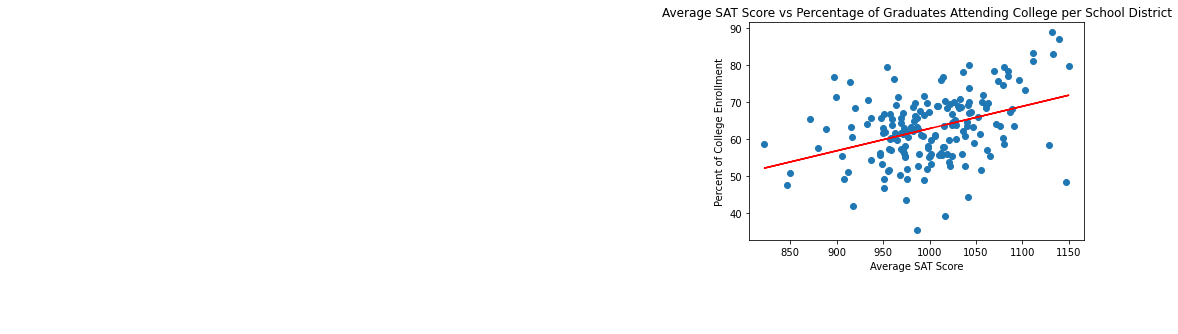

In [64]:
x_values = clean_grad_sat_df['District Average Score']
y_values = clean_grad_sat_df['Percent of College Enrollment']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Average SAT Score vs Percentage of Graduates Attending College per School District')
plt.xlabel('Average SAT Score')
plt.ylabel('Percent of College Enrollment')
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.savefig("Images/SATvsCollegeReg")
plt.show()